# CRO Project data analysis / build feature vector

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
import statsmodels.api as sm
from scipy.stats import chisquare
from datetime import datetime

# Hide deprecated warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
bias = pd.read_csv('bias_2_df.csv')
sales = pd.read_csv('delivery_sales.csv')
product = pd.read_csv('new_cat.csv')
city = pd.read_csv('city_pop.csv')

In [3]:
bias.head()

,seller_id,months_per_seller,autumn,spring,summer,winter,2016,2017,2018,orders_month_mean,orders_month_max,orders_month_min
0,0015a82c2db000af6aaaf3ae2ecb0532,1,0.0,3.0,0.0,0.0,0.0,3.0,0.0,3.000000,3,3
1,001cca7ae9ae17fb1caed9dfb1094831,18,80.0,54.0,31.0,35.0,0.0,172.0,28.0,11.111111,24,1
2,001e6ad469a905060d959994f1b41e4f,1,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.000000,1,1
3,002100f778ceb8431b7a1020ff7ab48f,8,3.0,34.0,12.0,2.0,0.0,36.0,15.0,6.375000,15,2
4,003554e2dce176b5555353e4f3555ac8,1,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.000000,1,1


In [4]:
bias.shape

(3095, 12)

In [5]:
sales.head()

,seller_id,mean_shipping_time,order_id_x,max_shipping_time,order_id_y,min_shipping_time,mean_freight_value,order_id_x.1,max_freight_value,order_id_y.1,min_freight_value,seller_city,seller_state,items_value,mean_sales_value,max_sales_value,min_sales_value,median_sales_value
0,0015a82c2db000af6aaaf3ae2ecb0532,9.666667,d455a8cb295653b55abda06d434ab492,12.000000,7f39ba4c9052be115350065d07583cac,8.000000,21.020000,d455a8cb295653b55abda06d434ab492,21.02,7f39ba4c9052be115350065d07583cac,21.02,santo andre,SP,2685.00,895.000000,895.0,895.0,895.00
1,001cca7ae9ae17fb1caed9dfb1094831,12.488725,ffe4972089425f7752aad086a7fdce28,72.000000,006e43460a55bc60c0a437521e426529,3.000000,37.577164,ffe4972089425f7752aad086a7fdce28,114.62,006e43460a55bc60c0a437521e426529,14.72,cariacica,ES,30612.42,128.085439,499.5,69.9,99.99
2,001e6ad469a905060d959994f1b41e4f,11.548997,8501926dd0837d694fc5af339c02a6b2,11.548997,8501926dd0837d694fc5af339c02a6b2,11.548997,17.940000,8501926dd0837d694fc5af339c02a6b2,17.94,8501926dd0837d694fc5af339c02a6b2,17.94,sao goncalo,RJ,250.00,250.000000,250.0,250.0,250.00
3,002100f778ceb8431b7a1020ff7ab48f,14.814686,f4fdb235ce7c1f7d3eb1b2fdd3a4f610,40.000000,044cd7ffb6a41e6e5513c6595a2893ca,6.000000,14.505098,f4fdb235ce7c1f7d3eb1b2fdd3a4f610,34.15,044cd7ffb6a41e6e5513c6595a2893ca,4.91,franca,SP,1318.00,23.963636,129.9,9.9,17.90
4,003554e2dce176b5555353e4f3555ac8,4.000000,7e4f454abfc163899a6ef5b4d5facfb2,4.000000,7e4f454abfc163899a6ef5b4d5facfb2,4.000000,19.380000,7e4f454abfc163899a6ef5b4d5facfb2,19.38,7e4f454abfc163899a6ef5b4d5facfb2,19.38,goiania,GO,120.00,120.000000,120.0,120.0,120.00


In [6]:
sales_clean = sales.drop(['order_id_x','order_id_y','order_id_x.1','order_id_y.1','seller_city'], axis = 1) 

In [7]:
sales_clean.head(2)

,seller_id,mean_shipping_time,max_shipping_time,min_shipping_time,mean_freight_value,max_freight_value,min_freight_value,seller_state,items_value,mean_sales_value,max_sales_value,min_sales_value,median_sales_value
0,0015a82c2db000af6aaaf3ae2ecb0532,9.666667,12.0,8.0,21.020000,21.02,21.02,SP,2685.00,895.000000,895.0,895.0,895.00
1,001cca7ae9ae17fb1caed9dfb1094831,12.488725,72.0,3.0,37.577164,114.62,14.72,ES,30612.42,128.085439,499.5,69.9,99.99


In [8]:
sales_clean.shape

(3095, 13)

In [9]:
product.head()

,seller_id,babies,books,car_acc,cinema,construction,cosmetics,electronics,fashion,food,forniture,garden,house,music,pets,stationary_arts,toys
0,0015a82c2db000af6aaaf3ae2ecb0532,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
1,001cca7ae9ae17fb1caed9dfb1094831,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,001cca7ae9ae17fb1caed9dfb1094831,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
3,001e6ad469a905060d959994f1b41e4f,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
4,002100f778ceb8431b7a1020ff7ab48f,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0


In [10]:
city.head()

,city,population,new_names,seller_id,city_size
0,alambari,4884,alambari,717b78b0950b51ed00b1471d858b0edc,small
1,cordilheira alta,3767,cordilheira alta,cecd97bc34ed8330bd4cd15713eda670,small
2,entre rios do oeste,3926,entre rios do oeste,4d600e08ecbe08258c79e536c5a42fee,small
3,imigrante,3023,imigrante,417a1e6c7321084d2a0ae0d023cfad93,small
4,japira,4903,japira,4677a5437afda5fa7140b927b07be1cc,small


In [11]:
city_clean = city.drop(['new_names','population'], axis = 1) 

### Merge clean dataframes

In [12]:
b = pd.merge(bias, sales_clean, on='seller_id', how='left')

In [13]:
b.head()

,seller_id,months_per_seller,autumn,spring,summer,winter,2016,2017,2018,orders_month_mean,...,min_shipping_time,mean_freight_value,max_freight_value,min_freight_value,seller_state,items_value,mean_sales_value,max_sales_value,min_sales_value,median_sales_value
0,0015a82c2db000af6aaaf3ae2ecb0532,1,0.0,3.0,0.0,0.0,0.0,3.0,0.0,3.000000,...,8.000000,21.020000,21.02,21.02,SP,2685.00,895.000000,895.0,895.0,895.00
1,001cca7ae9ae17fb1caed9dfb1094831,18,80.0,54.0,31.0,35.0,0.0,172.0,28.0,11.111111,...,3.000000,37.577164,114.62,14.72,ES,30612.42,128.085439,499.5,69.9,99.99
2,001e6ad469a905060d959994f1b41e4f,1,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.000000,...,11.548997,17.940000,17.94,17.94,RJ,250.00,250.000000,250.0,250.0,250.00
3,002100f778ceb8431b7a1020ff7ab48f,8,3.0,34.0,12.0,2.0,0.0,36.0,15.0,6.375000,...,6.000000,14.505098,34.15,4.91,SP,1318.00,23.963636,129.9,9.9,17.90
4,003554e2dce176b5555353e4f3555ac8,1,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.000000,...,4.000000,19.380000,19.38,19.38,GO,120.00,120.000000,120.0,120.0,120.00


In [14]:
city.shape

(3016, 5)

In [15]:
city.head()

,city,population,new_names,seller_id,city_size
0,alambari,4884,alambari,717b78b0950b51ed00b1471d858b0edc,small
1,cordilheira alta,3767,cordilheira alta,cecd97bc34ed8330bd4cd15713eda670,small
2,entre rios do oeste,3926,entre rios do oeste,4d600e08ecbe08258c79e536c5a42fee,small
3,imigrante,3023,imigrante,417a1e6c7321084d2a0ae0d023cfad93,small
4,japira,4903,japira,4677a5437afda5fa7140b927b07be1cc,small


In [16]:
data = pd.merge(b, product, on='seller_id', how='right')

In [17]:
feature_vector = pd.merge(data, city_clean, on='seller_id', how='left')

In [18]:
feature_vector.head()

,seller_id,months_per_seller,autumn,spring,summer,winter,2016,2017,2018,orders_month_mean,...,food,forniture,garden,house,music,pets,stationary_arts,toys,city,city_size
0,0015a82c2db000af6aaaf3ae2ecb0532,1,0.0,3.0,0.0,0.0,0.0,3.0,0.0,3.000000,...,0,0,0,0,0,0,0,0,santo andre,small
1,001cca7ae9ae17fb1caed9dfb1094831,18,80.0,54.0,31.0,35.0,0.0,172.0,28.0,11.111111,...,0,0,0,0,0,0,0,0,cariacica,small
2,001cca7ae9ae17fb1caed9dfb1094831,18,80.0,54.0,31.0,35.0,0.0,172.0,28.0,11.111111,...,0,0,1,0,0,0,0,0,cariacica,small
3,001e6ad469a905060d959994f1b41e4f,1,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.000000,...,0,0,0,0,0,0,0,0,sao goncalo,small
4,002100f778ceb8431b7a1020ff7ab48f,8,3.0,34.0,12.0,2.0,0.0,36.0,15.0,6.375000,...,0,1,0,0,0,0,0,0,franca,small


In [19]:
len(feature_vector)

6359

In [20]:
feature_vector_clean = feature_vector.drop_duplicates()

In [21]:
len(feature_vector_clean)

5365

In [22]:
feature_vector_clean.head()

,seller_id,months_per_seller,autumn,spring,summer,winter,2016,2017,2018,orders_month_mean,...,food,forniture,garden,house,music,pets,stationary_arts,toys,city,city_size
0,0015a82c2db000af6aaaf3ae2ecb0532,1,0.0,3.0,0.0,0.0,0.0,3.0,0.0,3.000000,...,0,0,0,0,0,0,0,0,santo andre,small
1,001cca7ae9ae17fb1caed9dfb1094831,18,80.0,54.0,31.0,35.0,0.0,172.0,28.0,11.111111,...,0,0,0,0,0,0,0,0,cariacica,small
2,001cca7ae9ae17fb1caed9dfb1094831,18,80.0,54.0,31.0,35.0,0.0,172.0,28.0,11.111111,...,0,0,1,0,0,0,0,0,cariacica,small
3,001e6ad469a905060d959994f1b41e4f,1,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.000000,...,0,0,0,0,0,0,0,0,sao goncalo,small
4,002100f778ceb8431b7a1020ff7ab48f,8,3.0,34.0,12.0,2.0,0.0,36.0,15.0,6.375000,...,0,1,0,0,0,0,0,0,franca,small


In [23]:
#Dummify seller state before ML
dummy_states = pd.get_dummies(feature_vector_clean['seller_state'])
dummy_states.columns

Index(['AC', 'AM', 'BA', 'CE', 'DF', 'ES', 'GO', 'MA', 'MG', 'MS', 'MT', 'PA',
       'PB', 'PE', 'PI', 'PR', 'RJ', 'RN', 'RO', 'RS', 'SC', 'SE', 'SP'],
      dtype='object')

In [24]:
feature_vector_clean = pd.concat([feature_vector_clean, dummy_states], axis=1)

In [25]:
feature_vector_clean.columns

Index(['seller_id', 'months_per_seller', 'autumn', 'spring', 'summer',
       'winter', '2016', '2017', '2018', 'orders_month_mean',
       'orders_month_max', 'orders_month_min', 'mean_shipping_time',
       'max_shipping_time', 'min_shipping_time', 'mean_freight_value',
       'max_freight_value', 'min_freight_value', 'seller_state', 'items_value',
       'mean_sales_value', 'max_sales_value', 'min_sales_value',
       'median_sales_value', 'babies', 'books', 'car_acc', 'cinema',
       'construction', 'cosmetics', 'electronics', 'fashion', 'food',
       'forniture', 'garden', 'house', 'music', 'pets', 'stationary_arts',
       'toys', 'city', 'city_size', 'AC', 'AM', 'BA', 'CE', 'DF', 'ES', 'GO',
       'MA', 'MG', 'MS', 'MT', 'PA', 'PB', 'PE', 'PI', 'PR', 'RJ', 'RN', 'RO',
       'RS', 'SC', 'SE', 'SP'],
      dtype='object')

In [26]:
feature_vector_clean.drop(['seller_state'], axis = 1).head() 

,seller_id,months_per_seller,autumn,spring,summer,winter,2016,2017,2018,orders_month_mean,...,PE,PI,PR,RJ,RN,RO,RS,SC,SE,SP
0,0015a82c2db000af6aaaf3ae2ecb0532,1,0.0,3.0,0.0,0.0,0.0,3.0,0.0,3.000000,...,0,0,0,0,0,0,0,0,0,1
1,001cca7ae9ae17fb1caed9dfb1094831,18,80.0,54.0,31.0,35.0,0.0,172.0,28.0,11.111111,...,0,0,0,0,0,0,0,0,0,0
2,001cca7ae9ae17fb1caed9dfb1094831,18,80.0,54.0,31.0,35.0,0.0,172.0,28.0,11.111111,...,0,0,0,0,0,0,0,0,0,0
3,001e6ad469a905060d959994f1b41e4f,1,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.000000,...,0,0,0,1,0,0,0,0,0,0
4,002100f778ceb8431b7a1020ff7ab48f,8,3.0,34.0,12.0,2.0,0.0,36.0,15.0,6.375000,...,0,0,0,0,0,0,0,0,0,1


In [27]:
feature_vector.columns

Index(['seller_id', 'months_per_seller', 'autumn', 'spring', 'summer',
       'winter', '2016', '2017', '2018', 'orders_month_mean',
       'orders_month_max', 'orders_month_min', 'mean_shipping_time',
       'max_shipping_time', 'min_shipping_time', 'mean_freight_value',
       'max_freight_value', 'min_freight_value', 'seller_state', 'items_value',
       'mean_sales_value', 'max_sales_value', 'min_sales_value',
       'median_sales_value', 'babies', 'books', 'car_acc', 'cinema',
       'construction', 'cosmetics', 'electronics', 'fashion', 'food',
       'forniture', 'garden', 'house', 'music', 'pets', 'stationary_arts',
       'toys', 'city', 'city_size'],
      dtype='object')

### Mean orders per month per type of product per state

In [28]:
#Orders month/ type of product / state

product_seller = feature_vector_clean[['seller_id', 'babies', 'books', 'car_acc', 'cinema',
       'construction', 'cosmetics', 'electronics', 'fashion', 'food',
       'forniture', 'garden', 'house', 'music', 'pets', 'stationary_arts','toys']].set_index('seller_id')

In [29]:
product_seller = pd.DataFrame(product_seller.stack()).reset_index()

In [34]:
product_seller.head()

,seller_id,level_1,0
0,0015a82c2db000af6aaaf3ae2ecb0532,babies,0
1,0015a82c2db000af6aaaf3ae2ecb0532,books,0
2,0015a82c2db000af6aaaf3ae2ecb0532,car_acc,0
3,0015a82c2db000af6aaaf3ae2ecb0532,cinema,0
4,0015a82c2db000af6aaaf3ae2ecb0532,construction,0


In [45]:
#Orders average per season

seasons_orders = feature_vector_clean[['autumn', 'spring', 'summer','winter','orders_month_mean']]
seasons_orders_df = pd.DataFrame(seasons_orders.stack()).reset_index()
seasons_orders_df.head()

,level_0,level_1,0
0,0,autumn,0.0
1,0,spring,3.0
2,0,summer,0.0
3,0,winter,0.0
4,0,orders_month_mean,3.0


In [46]:
seasons_orders_df.columns

Index(['level_0', 'level_1', 0], dtype='object')

In [47]:
seasons_orders_df = seasons_orders_df[~(seasons_orders_df['level_1'] == 'orders_month_mean')]

In [48]:
seasons_orders_df['level_1'].unique()

array(['autumn', 'spring', 'summer', 'winter'], dtype=object)

In [49]:
seasons_orders_df = seasons_orders_df.rename(columns={"level_0": "sellers", "level_1": "seasons",0:"avg_orders"})

In [50]:
seasons_orders_df.head()

,sellers,seasons,avg_orders
0,0,autumn,0.0
1,0,spring,3.0
2,0,summer,0.0
3,0,winter,0.0
5,1,autumn,80.0


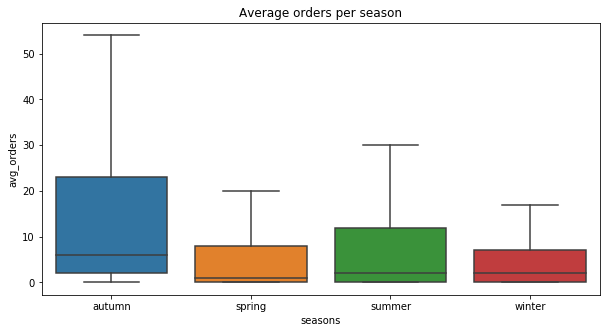

In [39]:
#orders/season: boxplot.
_=plt.figure(figsize=(10,5))
_=sns.boxplot(x="seasons", y="avg_orders", data=seasons_orders_df, showfliers=False)
_=plt.title("Average orders per season")


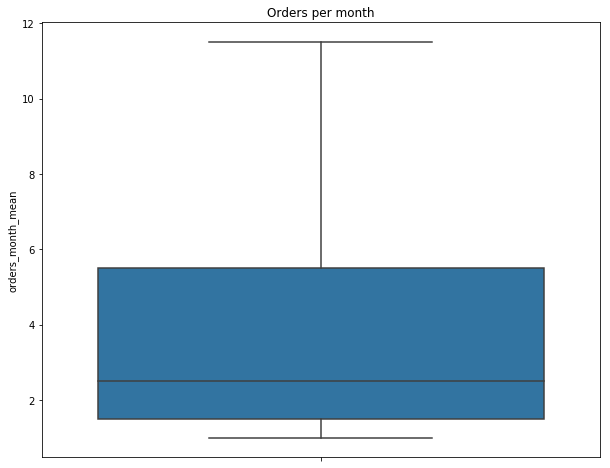

In [40]:
#orders/month: boxplot.
_=plt.figure(figsize=(10,8))
_=sns.boxplot( y=feature_vector_clean["orders_month_mean"],showfliers=False)
_=plt.title("Orders per month")


In [41]:
#orders/Year: line plot. Increase of the sales with the years. -> TABLEAU

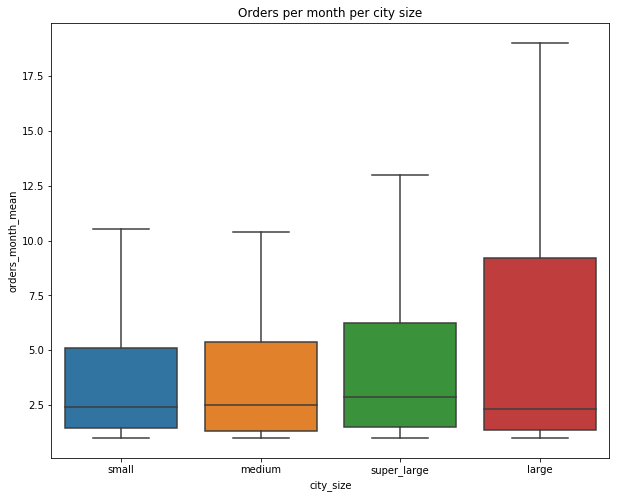

In [44]:
#orders/month/city size
_=plt.figure(figsize=(10,8))
_=sns.boxplot( x=feature_vector_clean["city_size"], y=feature_vector_clean["orders_month_mean"],showfliers=False )
_=plt.title("Orders per month per city size")

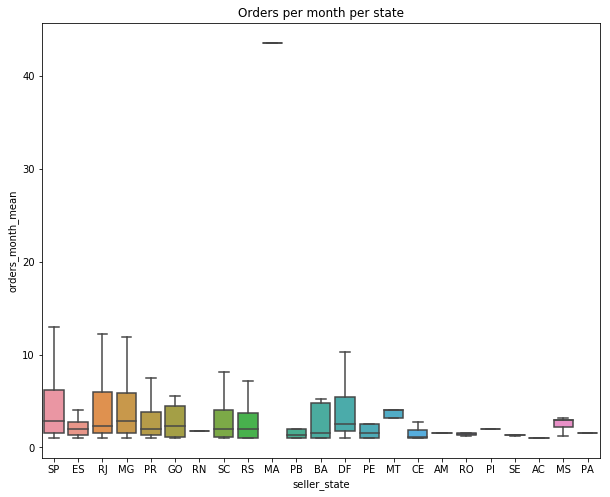

In [45]:
#orders/month/seller state: barplot/map. Map on Tableau.
_=plt.figure(figsize=(10,8))
_=sns.boxplot( x=feature_vector_clean["seller_state"], y=feature_vector_clean["orders_month_mean"],showfliers=False )
_=plt.title("Orders per month per state")

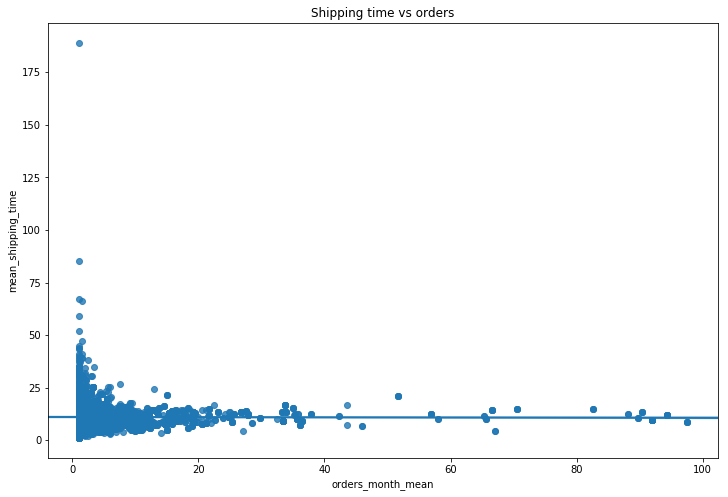

In [46]:
#Shipping time/ orders: scatter plot. Higher sale rates means higher shipping time.

_=plt.figure(figsize=(12,8))
_=sns.regplot(x=feature_vector_clean["orders_month_mean"], y=feature_vector_clean["mean_shipping_time"])
_=plt.title("Shipping time vs orders")

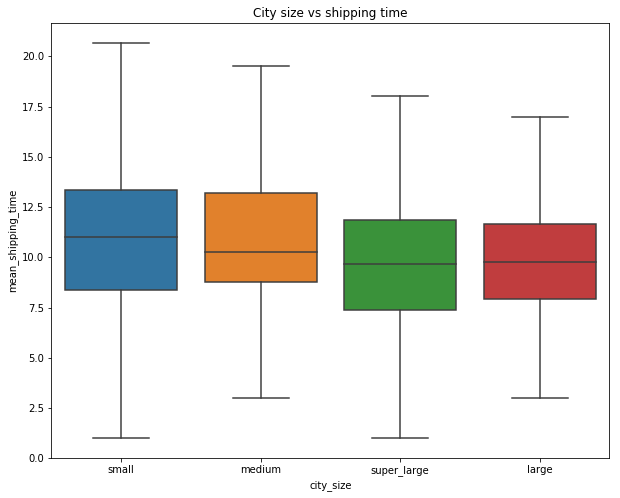

In [47]:
#Shipping time/ city size: boxplot. 
_=plt.figure(figsize=(10,8))
_=sns.boxplot( x=feature_vector_clean["city_size"], y=feature_vector_clean["mean_shipping_time"],showfliers=False )
_=plt.title("City size vs shipping time")

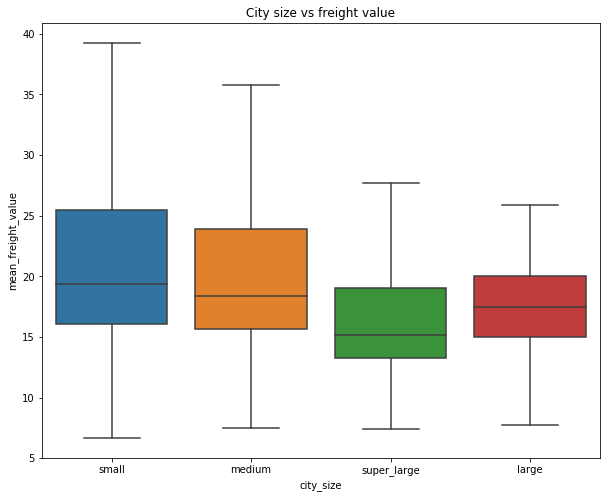

In [49]:
#Shipping cost/city size: bar plot. 
_=plt.figure(figsize=(10,8))
_=sns.boxplot( x=feature_vector_clean["city_size"], y=feature_vector_clean["mean_freight_value"],showfliers=False )
_=plt.title("City size vs freight value")

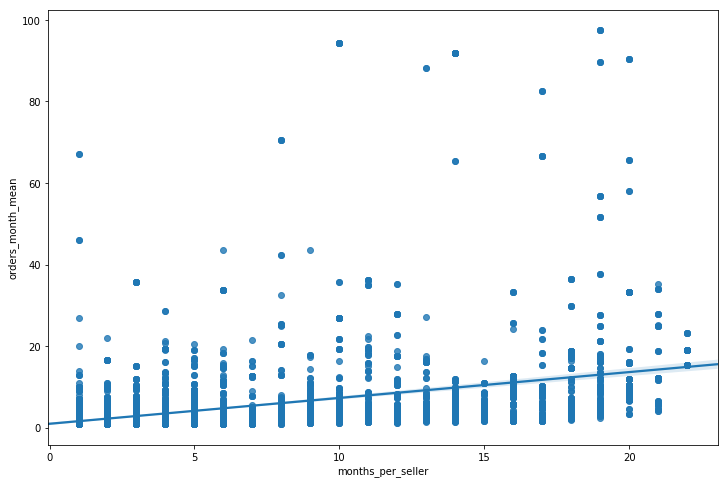

In [42]:
#orders/average month/ number of months sellers: scatter plot/barplot. More time, better sales.
_=plt.figure(figsize=(12,8))
_=sns.regplot(x=feature_vector_clean["months_per_seller"], y=feature_vector_clean["orders_month_mean"])
#_=plt.title("Shipping time vs sales")